# GDP分析
## 1 分析过程与目标
- 数据来源
- 熟悉数据
- 分析过程
- 分析结果呈现
- 使用知识点与代码实现

### 1.1 数据来源
- 企业内部采集数据：web端,小程序,Android或者IOS应用，智能设备(智能电表，温度传感器等)
- 开方数据平台：国家数据统计局，世界银行数据等
- 第三方数据集：kaagle等竞赛平台
- 爬虫抓取第三方数据
- 数据可能由多源组成

### 1.2 熟悉数据
- 通过工具展示数据
- 查看数据字段
- 多个数据源观察，数据源关系

## 2 各国与地区GDP数据分析关系多源组成

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
#读取excel文件
fpath = r'data\GDP.csv'
f = open(fpath)
pdata = pd.read_csv(f)
pdata

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


### 2.2 清洗数据
观察数据，删除无用数据；

In [2]:
pdata.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [3]:
#删除数据
pdata = pdata.drop(['Country Code','Indicator Name', 'Indicator Code'], axis=1)
#重置索引
pdata = pdata.set_index('Country Name')
pdata = pdata.stack()
pdata = pd.DataFrame(pdata)
pdata.columns = ['GDP']
pdata

GDP
Country Name                   
Aruba        1994  1.330168e+09
             1995  1.320670e+09
             1996  1.379888e+09
             1997  1.531844e+09
             1998  1.665363e+09
...                         ...
Zimbabwe     2012  1.424249e+10
             2013  1.545177e+10
             2014  1.589105e+10
             2015  1.630467e+10
             2016  1.661996e+10

[11507 rows x 1 columns]

### 2.3 设定分析目标
- 主要国家GDP数据变化
- 从1990年开始主要国家GDP数据变化
- 中国GDP1990年开始GDP增长与累积增长
- 中国GDP1990年开始，增长超过10%年份
- 中国GDP连续5年增长最高的年份

## 3 主要国家DGP分析
选择国家：`['China', 'Japan','United States', 'Germany', 'France', 'United Kingdom']`
### 3.1 主要国家GDP趋势
问题：选择合适图表代表数据趋势？折线图图]最高的年份

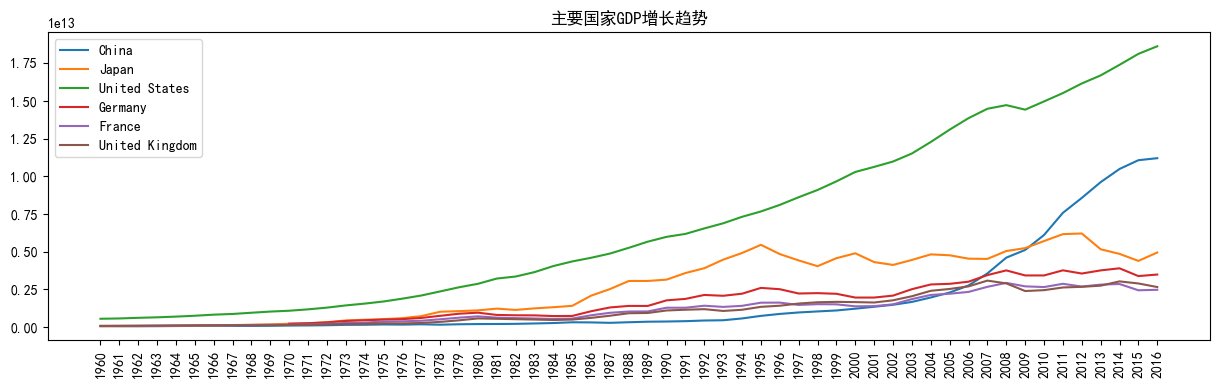

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
#设置支持中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
#设置画布大小
plt.figure(1,figsize=(15, 4))
countrys = ['China', 'Japan','United States', 'Germany', 'France', 'United Kingdom']
for c in countrys:
    plt.plot(pdata.loc[c])
plt.title("主要国家GDP增长趋势")
plt.legend(countrys)
_ = plt.xticks(rotation=90)

### 3.2 1990年开始GDP对比

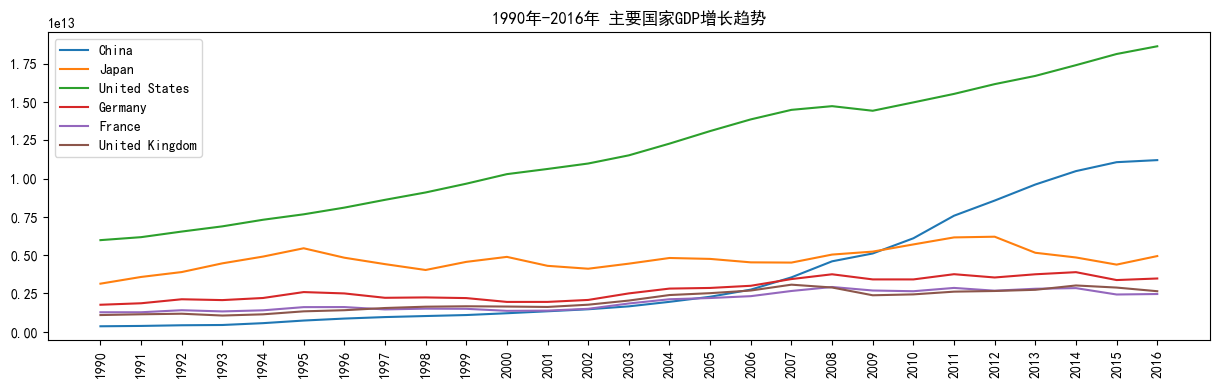

In [5]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15, 4))
countrys = ['China', 'Japan','United States', 'Germany', 'France', 'United Kingdom']
for c in countrys:
    #取国家，切片，取年代
    plt.plot(pdata.loc[c]['1990':])
plt.title("1990年-2016年 主要国家GDP增长趋势")
plt.legend(countrys)
_ = plt.xticks(rotation=90)

## 4 中国GDP分析
### 4.1 从1990年开始GDP变化化

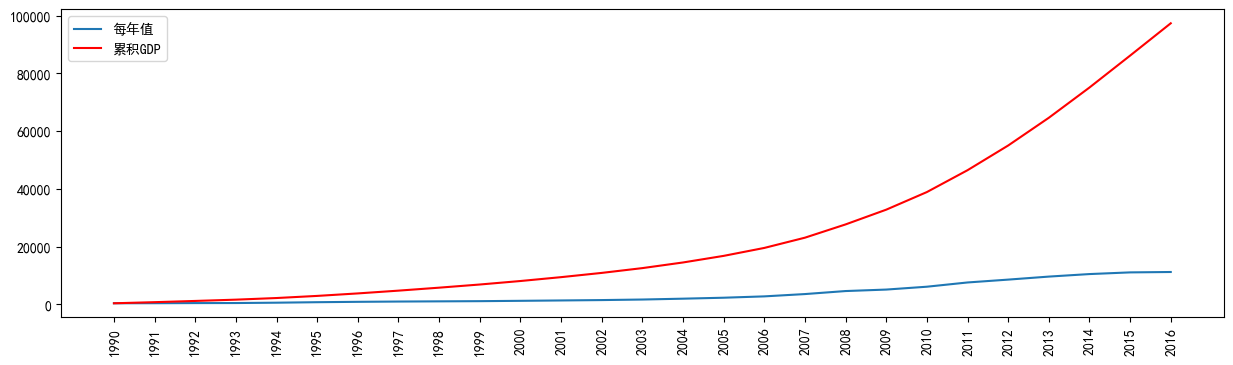

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
_ = plt.figure(1,figsize=(15, 4))
#国家
countrys = ['China']
base1 = 10000*10000*10
base2 = 10000*10000*10
for c in countrys: 
    #中国，年份1990-
    data = pdata.loc[c]['1990':]
    plt.plot(data/base1, label='每年值')
    #累计值
    plt.plot(data.cumsum()/base1,label='累积GDP', color='r')
plt.legend()
_ = plt.xticks(rotation=90)

### 4.2 中国GDP分析增长超过10%的年份
问题： 计算每一年增长率，使用什么知识点？

In [7]:
gdp = pdata.loc['China']['1990':]
gdp

,GDP
1990,3.608580e+11
1991,3.833730e+11
1992,4.269160e+11
1993,4.447310e+11
1994,5.643250e+11
1995,7.345480e+11
1996,8.637470e+11
1997,9.616040e+11
1998,1.029040e+12
1999,1.094000e+12


#### 4.2.1 计算每年增长率思路
思路1：循环迭代 ：第二年-第一年/第一年

思路2：利用numpy计算

- 第一年数据tmp1：`[开始：结束-1]`
- 第二年数据tmp2：`[第二年:结束]`
- 结果：tmp2-tmp1/tmp1 * 10000算

In [8]:
#获取第一年与第二年数据
tmp1 = gdp.loc[:'2015']['GDP']/1000000
tmp2 = gdp.loc['1991':]['GDP']/1000000
#转换成整数
tmp1 = tmp1.astype('i')
tmp2 = tmp2.astype('i')
#计算增长率
index = (tmp2.values-tmp1.values)/tmp1.values*100
#第一年插入0
grow = np.insert(index, 0, 0)
#插入新的列
gdp['grow'] = grow
gdp

,GDP,grow
1990,3.608580e+11,0.000000
1991,3.833730e+11,6.239296
1992,4.269160e+11,11.357868
1993,4.447310e+11,4.172952
1994,5.643250e+11,26.891312
1995,7.345480e+11,30.164001
1996,8.637470e+11,17.588912
1997,9.616040e+11,11.329359
1998,1.029040e+12,7.012866
1999,1.094000e+12,6.312680


#### 4.2.2 获取增长大于10%的年份

In [9]:
vals = gdp[gdp.grow > 10]
vals

,GDP,grow
1992,4.269160e+11,11.357868
1994,5.643250e+11,26.891312
1995,7.345480e+11,30.164001
1996,8.637470e+11,17.588912
1997,9.616040e+11,11.329359
2000,1.211350e+12,10.726691
2001,1.339400e+12,10.570851
2003,1.660290e+12,12.902655
2004,1.955350e+12,17.771594
2005,2.285970e+12,16.908482


### 4.3 5年连续累加增长率最高年份
分析问题：5年连续增长：第一年+第二年+第三年...+第五年

如何计算并获取最

#### 4.3.1 rolling:移动窗口方法
应用场景：金融，股票，统计等大？

In [10]:
#求连续2个数据中最大值
tmp = pd.Series([1,2,3,1,1,0])
tmp.rolling(2).max()

0    NaN
1    2.0
2    3.0
3    3.0
4    1.0
5    1.0
dtype: float64

In [11]:
tmp = pd.Series([1,2,3,1,1,0])
print(tmp.rolling(2).min_periods)

None


In [12]:
tmp.rolling?

Signature:
tmp.rolling(
    window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: 'IntervalClosedType | None' = None,
    step: 'int | None' = None,
    method: 'str' = 'single',
) -> 'Window | Rolling'
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, timedelta, str, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If a timedelta, str, or offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_guid

In [13]:
tmp = gdp.rolling(5).sum()
tmp

,GDP,grow
1990,NaN,NaN
1991,NaN,NaN
1992,NaN,NaN
1993,NaN,NaN
1994,2.180203e+12,48.661428
1995,2.553893e+12,78.825430
1996,3.034267e+12,90.175045
1997,3.568955e+12,90.146536
1998,4.153264e+12,92.986450
1999,4.682939e+12,72.407818


In [14]:
tmp[tmp['grow']==tmp.grow.max()]

,GDP,grow
2008,1.514384e+13,113.590056


# 电商分析 
## 1 案例:某年淘宝双12部分购物数据
### 1.1 数据：某年淘宝双12部分购物数据；
来源：天池数据平台
### 1.2 分析目的：
- 熟悉电商常用分析指标
- 用户行为分析
- 用户价值模型
## 2 熟悉数据
### 2.1 导入数据

In [15]:
import pandas as pd
fpath = r'data\data.csv'
pdata = pd.read_csv(fpath)
pdata.columns

Index(['user_id', 'item_id', 'behavior_type', 'user_geohash', 'item_category',
       'time'],
      dtype='object')

| 字段 | 字段说明 | 提取说明  |
| --- | --- | ---  |
| user_id | 用户标识 | 抽样&字段脱敏（非真实ID）  |
| item_id | 商品标识 | 字段脱敏（非真实ID）  |
| behavior_type | 用户对商品的行为类型 | 包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4。  |
| user_geohash | 用户位置的空间标识，可以为空 | 由经纬度通过保密的算法生成  |
| item_category | 商品分类标识 | 字段脱敏 | （非真实ID）  |
| time | 行为时间 | 精确到 a cell.

In [16]:
pdata

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22


In [17]:
# 数据量大小
len(pdata)

12256906

In [18]:
#判断缺失数据计算
missAll = pdata.isnull().sum()
missAll

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [19]:
#统计缺失字段
missField = missAll[missAll>0] 
missField

user_geohash    8334824
dtype: int64

### 2.2 基本分析
指标：PV与UV
- PV(访问量)：Page View,览量/点击量(包括重复浏览)。
- UV(独立访客)：Unique Visitor, 独立用户或者设备访问量。。


In [20]:
#将字符串时间转成Timestamp
pdata['ts'] = pd.to_datetime(pdata['time'])

In [21]:
pdata['hour'] = pdata.ts.map(lambda item: item.hour)
pdata['day'] =pdata.ts.map(lambda item: item.date())
pdata

,user_id,item_id,behavior_type,user_geohash,item_category,time,ts,hour,day
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06 02:00:00,2,2014-12-06
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09 20:00:00,20,2014-12-09
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18 11:00:00,11,2014-12-18
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06 10:00:00,10,2014-12-06
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16 21:00:00,21,2014-12-16
...,...,...,...,...,...,...,...,...,...
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21,2014-12-13 21:00:00,21,2014-12-13
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21,2014-12-14 21:00:00,21,2014-12-14
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16,2014-12-11 16:00:00,16,2014-12-11
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22,2014-12-08 22:00:00,22,2014-12-08


In [22]:
#PV分析：每天访问量
daily_pv = pdata.groupby('day')['user_id'].count()
daily_pv

day
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
2014-11-23    382702
2014-11-24    378342
2014-11-25    370239
2014-11-26    360896
2014-11-27    371384
2014-11-28    340638
2014-11-29    364697
2014-11-30    401620
2014-12-01    394611
2014-12-02    405216
2014-12-03    411606
2014-12-04    399952
2014-12-05    361878
2014-12-06    389610
2014-12-07    399751
2014-12-08    386667
2014-12-09    398025
2014-12-10    421910
2014-12-11    488508
2014-12-12    691712
2014-12-13    407160
2014-12-14    402541
2014-12-15    398356
2014-12-16    395085
2014-12-17    384791
2014-12-18    375597
Name: user_id, dtype: int64

In [23]:
# UV分析：每天独立用户数
tmp = pdata.groupby('day')['user_id']
#每个分组去重，并统计数量
daily_uv = tmp.apply(lambda x:x.drop_duplicates().count())

In [24]:
daily_uv

day
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
2014-11-23    6373
2014-11-24    6513
2014-11-25    6351
2014-11-26    6357
2014-11-27    6359
2014-11-28    6189
2014-11-29    6224
2014-11-30    6379
2014-12-01    6544
2014-12-02    6550
2014-12-03    6585
2014-12-04    6531
2014-12-05    6367
2014-12-06    6440
2014-12-07    6422
2014-12-08    6564
2014-12-09    6566
2014-12-10    6652
2014-12-11    6894
2014-12-12    7720
2014-12-13    6776
2014-12-14    6668
2014-12-15    6787
2014-12-16    6729
2014-12-17    6643
2014-12-18    6582
Name: user_id, dtype: int64

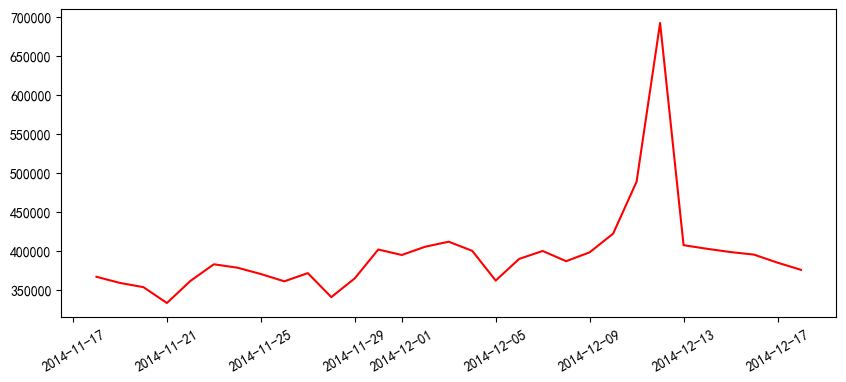

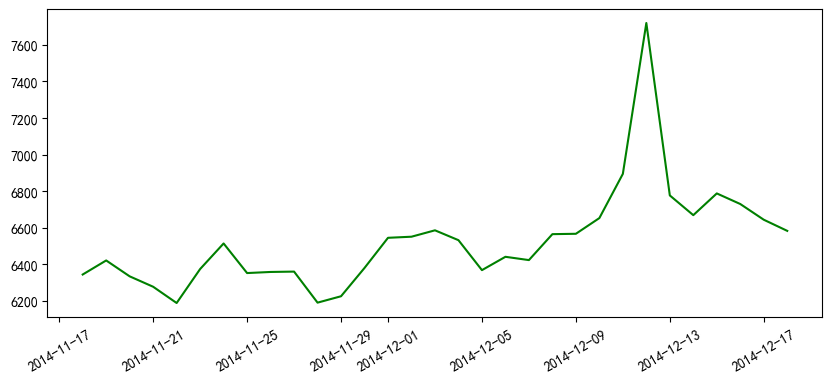

In [25]:
#PV与UV的数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,4))
plt.plot(daily_pv.index.values,daily_pv.values, 'r')
plt.xticks(rotation=30)
plt.figure(figsize=(10,4))
plt.plot(daily_uv.index.values,daily_uv.values, 'g')
plt.xticks(rotation=30)
plt.show()

用户购买次数分布：
- 这一期间每个用户支付次数
- 统计每个用户支付次数
- 使用直方图展示

步骤：
- 过滤数据：行为为支付
- 分组：根据user_id分组,groupby
- 统计：使用count方法分组
- 可视化：使用hist方法直方图显示方法直方图显示

<AxesSubplot: ylabel='Frequency'>

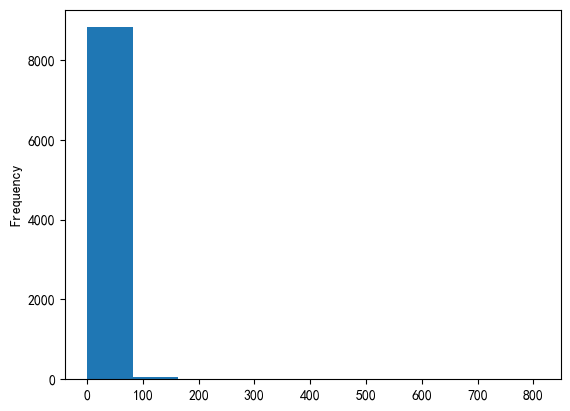

In [26]:
user_bynums=pdata[pdata.behavior_type==4].groupby('user_id')['behavior_type'].count()
user_bynums.plot.hist()

In [27]:
user_bynums

user_id
4913          6
6118          1
7528          6
7591         21
12645         8
             ..
142376113     1
142412247    12
142430177     5
142450275    40
142455899    13
Name: behavior_type, Length: 8886, dtype: int64

用户复购

- 复购：用户两天以上有购买行为
- 
复购率：复购行为用户数/有购买行为的用户总数

In [28]:
#实现方式1
#根据用户与时间分组,并查看数据
redata =pdata[pdata.behavior_type==4].groupby(['user_id', 'day']).count()
redata

item_id  behavior_type  user_geohash  item_category  \
user_id   day                                                               
4913      2014-12-01        1              1             0              1   
          2014-12-07        2              2             2              2   
          2014-12-11        1              1             0              1   
          2014-12-13        1              1             0              1   
          2014-12-16        1              1             0              1   
...                       ...            ...           ...            ...   
142455899 2014-11-24        1              1             0              1   
          2014-11-26        2              2             0              2   
          2014-11-30        1              1             0              1   
          2014-12-03        1              1             0              1   
          2014-12-04        2              2             0              2   

                      time  ts  hour  
user_id   day                         
4913      2014-12-01     1   1     1  
          2014-12-07     2   2     2  
          2014-12-11     1   1     1  
          2014-12-13     1   1     1  
          2014-12-16     1   1     1  
...                    ...  ..   ...  
142455899 2014-11-24     1   1     1  
          2014-11-26     2   2     2  
          2014-11-30     1   1     1  
          2014-12-03     1   1     1  
          2014-12-04     2   2     2  

[49201 rows x 7 columns]

In [29]:
#重置索引
redata = redata.reset_index()
redata

,user_id,day,item_id,behavior_type,user_geohash,item_category,time,ts,hour
0,4913,2014-12-01,1,1,0,1,1,1,1
1,4913,2014-12-07,2,2,2,2,2,2,2
2,4913,2014-12-11,1,1,0,1,1,1,1
3,4913,2014-12-13,1,1,0,1,1,1,1
4,4913,2014-12-16,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
49196,142455899,2014-11-24,1,1,0,1,1,1,1
49197,142455899,2014-11-26,2,2,0,2,2,2,2
49198,142455899,2014-11-30,1,1,0,1,1,1,1
49199,142455899,2014-12-03,1,1,0,1,1,1,1


In [30]:
#根据user_id分组，并统计day的数量
ret = redata.groupby('user_id')['day'].count()
ret

user_id
4913         5
6118         1
7528         6
7591         9
12645        4
            ..
142376113    1
142412247    7
142430177    5
142450275    8
142455899    7
Name: day, Length: 8886, dtype: int64

In [31]:
#获取数量大于1的数据，计算复购率
ret[ret>1].count()/ret.count()

0.8717083051991897

In [32]:
#实现方式2
#根据user_id分组
re_data=pdata[pdata.behavior_type==4].groupby('user_id')
re_data

In [33]:
'''
使用apply方法对分组数据进行处理，
每个apply方法处理的user_id对应的series对象
使用unique获取唯一值
使用len方法获取长度
'''
re_data = re_data['day'].apply(lambda x:len(x.unique()))
re_data

user_id
4913         5
6118         1
7528         6
7591         9
12645        4
            ..
142376113    1
142412247    7
142430177    5
142450275    8
142455899    7
Name: day, Length: 8886, dtype: int64

In [34]:
#计算复购率
re_data[re_data>1].count()/re_data.count()

0.8717083051991897

用户复购时间间隔

复购间隔：
- 按时间排序
- 用户第1次购物时间：day1
- 用户第2次购物时间：day2 , 间隔：day2-day1
- 用户第3次购物时间：day3 , 间隔：day3-day2
- 用户第N次购物时间：dayn , 间隔：dayn-dayn-1

要求：时间间隔大于0间间隔大于0

In [35]:
p = pd.Series([1,2,7,4,10])
p.diff(1)

0    NaN
1    1.0
2    5.0
3   -3.0
4    6.0
dtype: float64

In [36]:
#删除缺省值
p.diff(2).dropna()

2    6.0
3    2.0
4    3.0
dtype: float64

In [37]:
#分组
userbuy=pdata[pdata.behavior_type==4].groupby('user_id')
#对天进行处理
#lambda的每个x为分组后的series对象
# series对象排序，并使用diff方法计算，并去除缺省值
day_interval = userbuy.day.apply(lambda x:x.sort_values().diff(1).dropna())

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\2976211149.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  day_interval = userbuy.day.apply(lambda x:x.sort_values().diff(1).dropna())


In [38]:
day_interval

user_id            
4913       7829893    6 days
           10689246   0 days
           11629048   4 days
           3285878    2 days
           11629584   3 days
                       ...  
142455899  6697898    0 days
           9798799    4 days
           6698066    3 days
           1345137    1 days
           7372987    0 days
Name: day, Length: 111319, dtype: timedelta64[ns]

In [39]:
day_interval=day_interval.map(lambda x:x.days)
day_interval

user_id            
4913       7829893     6
           10689246    0
           11629048    4
           3285878     2
           11629584    3
                      ..
142455899  6697898     0
           9798799     4
           6698066     3
           1345137     1
           7372987     0
Name: day, Length: 111319, dtype: int64

In [40]:
day_interval = day_interval[day_interval>0]
day_interval

user_id            
4913       7829893     6
           11629048    4
           3285878     2
           11629584    3
7528       9688333     4
                      ..
142455899  6698002     2
           4209399     2
           9798799     4
           6698066     3
           1345137     1
Name: day, Length: 40315, dtype: int64

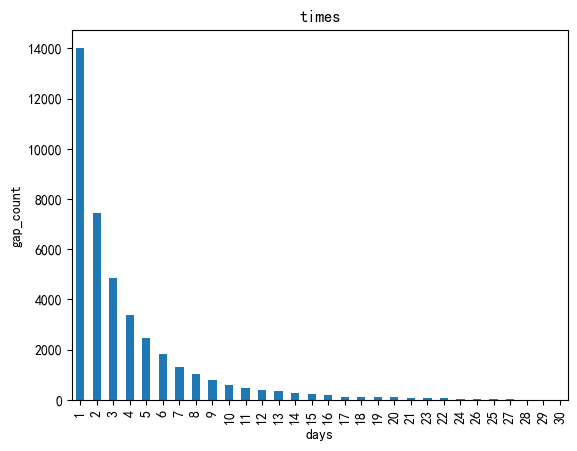

In [41]:
#统计每个时间数量，并绘制柱状图
day_interval.value_counts().plot(kind='bar')
plt.title('times')
plt.xlabel('days')
_ = plt.ylabel('gap_count')

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\1184355078.py:3: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  day_interval = pdata[pdata.behavior_type == 4].groupby('user_id').day.apply(lambda x:x.sort_values().diff(1).dropna())


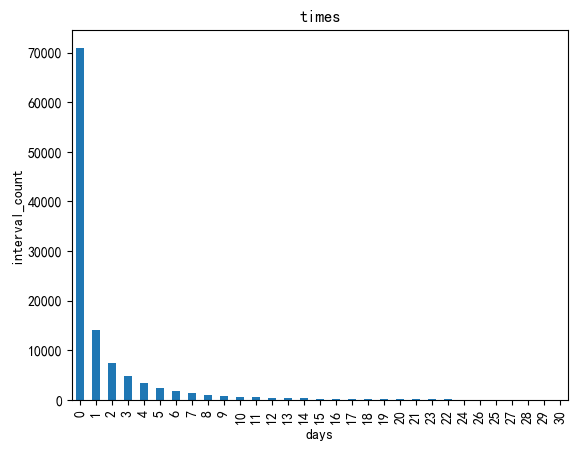

In [42]:
#用户购物行为及分组
#时间间隔大于1天
day_interval = pdata[pdata.behavior_type == 4].groupby('user_id').day.apply(lambda x:x.sort_values().diff(1).dropna())
#获取天数
day_interval = day_interval.map(lambda x:x.days)
#统计数量，并绘制柱状图
day_interval.value_counts().plot(kind='bar')
plt.title('times')
plt.xlabel('days')
_ = plt.ylabel('interval_count')

AARRR模型
- Acquisition 用户获取
- Activation 用户激活
- Retention 提高留存
- Revenue 增加收入
- Referral 传播推荐

AARRR模型描述了用户/客户/访客需经历的五个环节，以便企业获取价值。

关键点：通过模型提高留存和转化率

- 获取用户：获取用户方式，获取用户渠道，获取用户成本，用户定位等，例如：应用下载量，安装量，注册量
- 活跃度：日活，月活，使用时长，启动次数等
- 留存率：次日留存，周留存率，不同邻域用户，留存周期不同，例如：微博，1周未登录，可以视为流失用户；
- 收入：APA(活跃付费用户数),ARPU(平均每用户收入), ARPPU(平均每付费用户收入)；提高活跃度、提高留存率是增加收入基础。
- 传播推荐：用户自发传播，例如平多多砍价，核心：产品过硬：产品过硬率

In [43]:
event_type_count = pdata.groupby('behavior_type').size()
#重置索引并修改列名
event_type_count = event_type_count.reset_index().rename(columns={0:'total'})
#重置索引
event_type_count = event_type_count.set_index('behavior_type')
event_type_count

,total
behavior_type,
1,11550581
2,242556
3,343564
4,120205


In [44]:
# 将层级1视为基准
event_type_count['pre'] = (event_type_count.total/event_type_count.total[1])*100
event_type_count

,total,pre
behavior_type,,
1,11550581,100.000000
2,242556,2.099946
3,343564,2.974430
4,120205,1.040684


In [45]:
input_text = """字段	字段说明	提取说明
user_id	用户标识	抽样&字段脱敏（非真实ID）
item_id	商品标识	字段脱敏（非真实ID）
behavior_type	用户对商品的行为类型	包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4。
user_geohash	用户位置的空间标识，可以为空	由经纬度通过保密的算法生成
item_category	商品分类标识	字段脱敏 （非真实ID）
time	行为时间	精确到小时级别"""

# Split input into rows
rows = input_text.split('\n')

# Print the header row
print("|", " | ".join(rows[0].split()), " |")

# Print the separator row
print("|", " | ".join(["---"] * len(rows[0].split())), " |")

# Print the data rows
for row in rows[1:]:
    print("|", " | ".join(row.split()), " |")


| 字段 | 字段说明 | 提取说明  |
| --- | --- | ---  |
| user_id | 用户标识 | 抽样&字段脱敏（非真实ID）  |
| item_id | 商品标识 | 字段脱敏（非真实ID）  |
| behavior_type | 用户对商品的行为类型 | 包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4。  |
| user_geohash | 用户位置的空间标识，可以为空 | 由经纬度通过保密的算法生成  |
| item_category | 商品分类标识 | 字段脱敏 | （非真实ID）  |
| time | 行为时间 | 精确到小时级别  |


| 字段 | 字段说明 | 提取说明  |
| --- | --- | ---  |
| user_id | 用户标识 | 抽样&字段脱敏（非真实ID）  |
| item_id | 商品标识 | 字段脱敏（非真实ID）  |
| behavior_type | 用户对商品的行为类型 | 包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4。  |
| user_geohash | 用户位置的空间标识，可以为空 | 由经纬度通过保密的算法生成  |
| item_category | 商品分类标识 | 字段脱敏 | （非真实ID）  |
| time | 行为时间 | 精确到小时级别  |

## 3 用户价值分析
RFM模型是衡量当前用户价值和客户潜在价值的重要工具和手段
- R:最近一次消费（Recency）
- F:消费频率（Frequency）
- M:消费金额（Monetary）
### 3.1 R理解：
- 用户最近一次消费
- R值越小，说明用户的价值越高，例如：最近一次消费1个月，最近一次消费10个月
- R值非常大，说明该用户可能为流失用户；
### 3.2 F理解：
- 消费频率，指定时间内购买次数；
- 问题：一些商品购买频次较低，所以会将时间忽略，以购买次数为主；
- 不同品类产品，对F的理解不一样；例如：电子类产品频率较低；化妆品，衣服等消费品购买频次较高
### 3.3 M理解：
- 一定时间范围内，用户消费金额，消费金额越大，价值越高3.3 M理解：

In [46]:
#计算R，最近购物时间
#排序
tmp = pdata.sort_values('day')
#过滤数据，只保留购物的数据
tmp = tmp[tmp['behavior_type']==4]
#保留最后一个值，生成bool索引,删除最后一个，对应值为Flase
tindex = tmp.duplicated(subset=['user_id'], keep='last')
#boolean索引变化, 将False设置为True
sindex = tindex == False
#获取过滤后数据
tdata = tmp[sindex]
tdata

,user_id,item_id,behavior_type,user_geohash,item_category,time,ts,hour,day
6946622,49598175,176268691,4,97rjjab,11270,2014-11-18 18,2014-11-18 18:00:00,18,2014-11-18
7917659,141878326,379814689,4,NaN,8095,2014-11-18 11,2014-11-18 11:00:00,11,2014-11-18
7549224,61454609,134625812,4,99ui5e6,12067,2014-11-18 19,2014-11-18 19:00:00,19,2014-11-18
10056408,86985041,105821300,4,NaN,6669,2014-11-18 10,2014-11-18 10:00:00,10,2014-11-18
1961858,112485959,228534873,4,NaN,292,2014-11-18 11,2014-11-18 11:00:00,11,2014-11-18
...,...,...,...,...,...,...,...,...,...
319576,131514258,281172663,4,NaN,1514,2014-12-18 10,2014-12-18 10:00:00,10,2014-12-18
11888591,123848007,106982400,4,956k2js,11750,2014-12-18 14,2014-12-18 14:00:00,14,2014-12-18
3227167,49871598,47827433,4,96kajt4,2631,2014-12-18 11,2014-12-18 11:00:00,11,2014-12-18
6696914,136470861,347836659,4,9rf42od,10472,2014-12-18 10,2014-12-18 10:00:00,10,2014-12-18


In [47]:
#数量
len(tmp.groupby('user_id'))

8886

In [48]:
pd.to_datetime(tdata['day'])

6946622    2014-11-18
7917659    2014-11-18
7549224    2014-11-18
10056408   2014-11-18
1961858    2014-11-18
              ...    
319576     2014-12-18
11888591   2014-12-18
3227167    2014-12-18
6696914    2014-12-18
8618913    2014-12-18
Name: day, Length: 8886, dtype: datetime64[ns]

In [49]:
tdl = pd.to_datetime('2014-12-20') - pd.to_datetime(tdata['day'])
tdata['tdays'] = tdl.dt.days
tdata

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\4054848757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['tdays'] = tdl.dt.days


,user_id,item_id,behavior_type,user_geohash,item_category,time,ts,hour,day,tdays
6946622,49598175,176268691,4,97rjjab,11270,2014-11-18 18,2014-11-18 18:00:00,18,2014-11-18,32
7917659,141878326,379814689,4,NaN,8095,2014-11-18 11,2014-11-18 11:00:00,11,2014-11-18,32
7549224,61454609,134625812,4,99ui5e6,12067,2014-11-18 19,2014-11-18 19:00:00,19,2014-11-18,32
10056408,86985041,105821300,4,NaN,6669,2014-11-18 10,2014-11-18 10:00:00,10,2014-11-18,32
1961858,112485959,228534873,4,NaN,292,2014-11-18 11,2014-11-18 11:00:00,11,2014-11-18,32
...,...,...,...,...,...,...,...,...,...,...
319576,131514258,281172663,4,NaN,1514,2014-12-18 10,2014-12-18 10:00:00,10,2014-12-18,2
11888591,123848007,106982400,4,956k2js,11750,2014-12-18 14,2014-12-18 14:00:00,14,2014-12-18,2
3227167,49871598,47827433,4,96kajt4,2631,2014-12-18 11,2014-12-18 11:00:00,11,2014-12-18,2
6696914,136470861,347836659,4,9rf42od,10472,2014-12-18 10,2014-12-18 10:00:00,10,2014-12-18,2


In [50]:
#重置索引
rdata = tdata.set_index('user_id')
#设置R值
rdata['R'] = (rdata.tdays <= rdata.tdays.mean()).astype('i')
#过滤R列
rdata = rdata[['R']]
rdata

,R
user_id,
49598175,0
141878326,0
61454609,0
86985041,0
112485959,0
...,...
131514258,1
123848007,1
49871598,1


In [51]:
#计算F
#根据user_id分组，并且根据购物时间进行数量统计
fdata = tmp.groupby(['user_id']).time.count()
#重置索引
fdata = fdata.reset_index()
fdata = fdata.set_index('user_id')
fdata.columns = ['F']
fdata.F = pd.qcut(fdata.F, 2,['0','1'])
fdata

,F
user_id,
4913,0
6118,0
7528,0
7591,1
12645,0
...,...
142376113,0
142412247,1
142430177,0


In [52]:
# 数据集合并(R与F)
rfdata = pd.merge(rdata, fdata, left_index=True, right_index=True)
rfdata['RF'] = rfdata.R.astype(str).str.cat(rfdata.F)
rfdata

,R,F,RF
user_id,,,
49598175,0,0,00
141878326,0,0,00
61454609,0,0,00
86985041,0,0,00
112485959,0,0,00
...,...,...,...
131514258,1,1,11
123848007,1,1,11
49871598,1,1,11


In [53]:
def func(value):
    v = '一般用户'
    if value == '00':
        v = '一般用户'
    elif value == '01':
        v = '重要保持'
    elif value == '10':
        v = '重要发展'
    elif value == '11':
        v = '重要价值'
    return v

rfdata['level'] = rfdata.RF.map(func)
rfdata

,R,F,RF,level
user_id,,,,
49598175,0,0,00,一般用户
141878326,0,0,00,一般用户
61454609,0,0,00,一般用户
86985041,0,0,00,一般用户
112485959,0,0,00,一般用户
...,...,...,...,...
131514258,1,1,11,重要价值
123848007,1,1,11,重要价值
49871598,1,1,11,重要价值


In [54]:
#分组统计
rf = rfdata.groupby('RF').F.count()
#创建DataFrame对象
rf = rf.reset_index()
#修改列名
rf = rf.rename(columns = {'F':'count'})

In [55]:
rf

,RF,count
0,00,2540
1,01,966
2,10,1948
3,11,3432


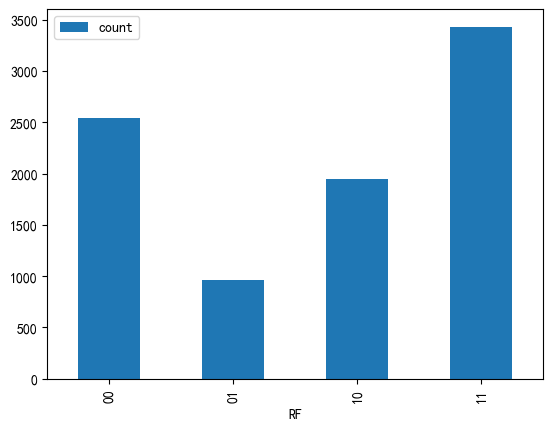

In [56]:
_ = rf.plot.bar(x = 'RF', y='count')

# 淘宝分析
## 1 淘宝内衣购买分析
目的：
- 非规则数据如何处理
- 掌握时间处理
- 如何选择维度
- seaborn与pandas操作
## 2 数据整理
###  2.1 实际工作中，我们的数据来自哪里
- 更多的根据自己产品采集数据
- 开源数据集
- 第三方数据
### 2.2 准备工作：
- 下载数据集
- 查看数据集
- 设定整理目标

数据内容：
- 文本文件
- 主要内容：2017-04-20 13: 06 :04,颜色分类:肤色薄款;尺码:38/85C,不错给婆婆买的，准备再买两件
从数据得到信息：
- 时间，颜色分类，尺寸，评论
- 数据不规范需要提取
- 目标： 提取时间，类别，尺寸，评论

### 2.3 将数据整理成DataFrame对象
知识点：
- 文件操作
- 正则
- 列表

实现思路：
- 逐行读取文件
- 使用正则切分数据
- 将数据添加到列表中
- 创建DataFrame对象aFrame对象
提取
目标： 提取时间，类别，尺寸，评论

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
path = r'data\cup_all.txt'
f = open(path, encoding='utf-8')
result = []
for line in f:
 t = re.sub(r'(颜色分类:)|(尺码:)', '', line.strip())
 t = re.split(r'[,;]', t, maxsplit=3)
 result.append(t)
 
df = pd.DataFrame(result, columns=['date', 'colortype','bsize', 'comment'])

In [58]:
df

,date,colortype,bsize,comment
0,2017-04-20 13:06:04,肤色薄款,38/85C,不错给婆婆买的，准备再买两件
1,2017-04-23 21:44:20,H007宝蓝色加粉色,34/75B,和想象的一样好！价格实惠！拢胸效果很好穿着舒服，就是我要的是宝蓝加肤色！给发了一件粉色，也不...
2,2017-05-18 10:36:31,超薄杯纯洁白,80C,真的不错
3,2017-04-19 20:44:51,浅紫,36B=80B,一次买了两件，内衣质量不错，无钢圈设计穿上很舒服也很有型，值得购买。
4,2017-05-07 09:16:47,卡其色,75A,因为手机号填错了结果直接被退件了_(：_」&ang;)_但是卖家还是超好心地给我重新送了回来qwq
...,...,...,...,...
200762,2017-03-13 20:32:45,黑色,75A,超级喜欢，蕾丝非常好看，又非常合适舒服，会回购，细肩带超级好看，也不会觉得松，很薄很舒适
200763,2017-05-31 13:51:40,拉丝黑色,80B=C杯,此用户没有填写评论!
200764,2017-04-05 15:46:44,卡其,75A,布料硬，穿着不舒服，聚拢效果一般，这种布料和聚拢效果配上这价格，不值得购买
200765,2017-05-19 10:19:12,全光肤,80C=36C,衣衣穿着刚刚好，也很舒服，比我上次在店里买的一件还舒服，厚度也合适，夏天就喜欢穿薄点的，不然...


## 3 时间分析
需求：
- 什么时候备货
- 是么时候在线

知识点：
- 对时间进行处理：按照月，日，小时拆分
- 知识点：pandas时间处理，period
### 3.1 时间处理
- 将date转成DatetimeIndex
- 使用DatetimeIndex将其转换成月，日，小时转换成月，日，小时

In [59]:
#将时间列转DatetimeIndex
dindex = pd.to_datetime(df.date.values)
#设置Period为Day
df['day'] = dindex.to_period('D')
#设置Period为Month
df['month'] = dindex.to_period('M')
#设置为小时
df['hour'] = dindex.strftime('%H')
df.head()

,date,colortype,bsize,comment,day,month,hour
0,2017-04-20 13:06:04,肤色薄款,38/85C,不错给婆婆买的，准备再买两件,2017-04-20,2017-04,13
1,2017-04-23 21:44:20,H007宝蓝色加粉色,34/75B,和想象的一样好！价格实惠！拢胸效果很好穿着舒服，就是我要的是宝蓝加肤色！给发了一件粉色，也不...,2017-04-23,2017-04,21
2,2017-05-18 10:36:31,超薄杯纯洁白,80C,真的不错,2017-05-18,2017-05,10
3,2017-04-19 20:44:51,浅紫,36B=80B,一次买了两件，内衣质量不错，无钢圈设计穿上很舒服也很有型，值得购买。,2017-04-19,2017-04,20
4,2017-05-07 09:16:47,卡其色,75A,因为手机号填错了结果直接被退件了_(：_」&ang;)_但是卖家还是超好心地给我重新送了回来qwq,2017-05-07,2017-05,09


### 3.2 时间统计
按照月进行统计

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\3023127516.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


Text(0.5, 0, '月')

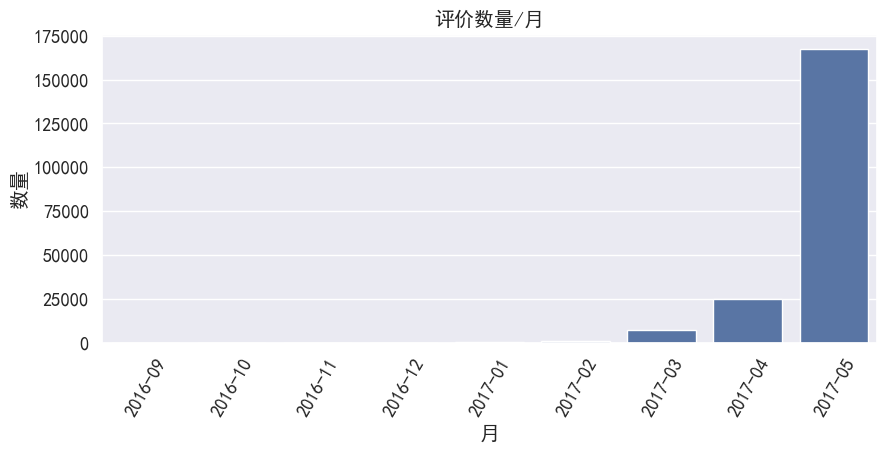

In [60]:
#sns设置，字体1.2倍
sns.set(font_scale=1.2)
#支持中文
sns.set_style({"font.sans-serif":['simhei','Droid Sans Fallback']})
#画布大小
plt.figure(figsize=(10,4))
#时间排序
morder = sorted(df.month.unique())
#使用countplot进行统计，并按时间排序
ax = sns.countplot(x= df.month, order=morder)
#设置x轴标签旋转60度
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_title('评价数量/月')
ax.set_ylabel('数量')
ax.set_xlabel('月')

按照小时排序

In [61]:
df.hour

0         13
1         21
2         10
3         20
4         09
          ..
200762    20
200763    13
200764    15
200765    10
200766    21
Name: hour, Length: 200767, dtype: object

Text(0.5, 0, '小时')

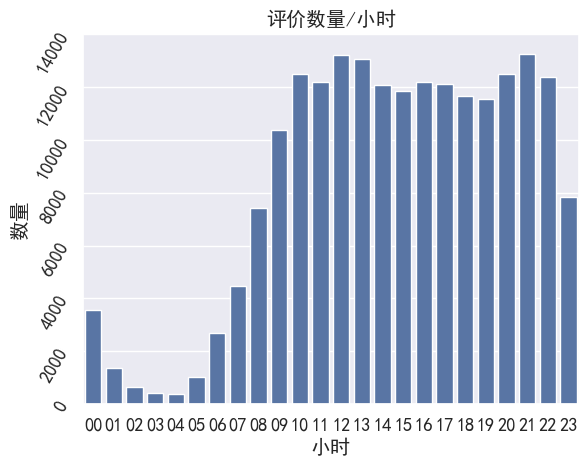

In [62]:
#通过评论信息，查看用户在线时间
# 先对数据按 'hour' 列进行排序
df = df.sort_values('hour')
# 绘图
ax = sns.countplot(x=df.hour, orient='h') 
# 先获取刻度位置
yticks = ax.get_yticks() # 将xticks改为yticks
# 再设置刻度位置
ax.set_yticks(yticks) # 将xticks改为yticks
#设置y轴标签旋转60度
_ = ax.set_yticklabels(ax.get_yticklabels(), rotation=60) # 将xticklabels改为yticklabels
ax.set_title('评价数量/小时')
ax.set_ylabel('数量') 
ax.set_xlabel('小时')

### 3.3 总结
- 通过月评价数量：在3月开始备货，到了45月是换机季节，多准备货源
- 通过小时评价量：用户在8点开始，就开始大量上线，一直到晚上11点，客流下降
## 4 用户属性分析
目的：
- 备货准备：尺寸，颜色，类型

知识点：
- pandas中的str方法与正则表达式
### 4.1 尺寸
- 查看数据：
- 根据ABCD简单获取尺寸

In [63]:
df.head()

,date,colortype,bsize,comment,day,month,hour
17352,2017-05-11 00:33:11,肤色-无钢圈,70A,收到宝贝了，大小刚刚好，颜色又很漂亮，穿起来很聚拢！大爱呀,2017-05-11,2017-05,00
47791,2017-05-17 00:52:10,浅紫色+肤色,80C,四个颜色都挺正，好评,2017-05-17,2017-05,00
54774,2017-05-28 00:22:24,肤色,70A=A杯,好棒！感觉比我买的三百多的都好;实话;很舒服！,2017-05-28,2017-05,00
135326,2017-05-28 00:01:04,灰蓝色,80B,内衣收到后还不错，就是有味儿,2017-05-28,2017-05,00
117839,2017-05-22 00:51:52,1991黑色套装,34/75B（厚杯）,一般般,2017-05-22,2017-05,00


- 解决方式：使用正则去获取ABCD

Text(0.5, 28.25, 'size')

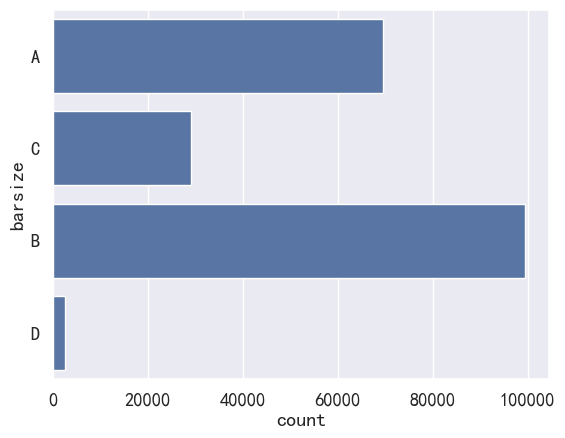

In [64]:
df['barsize'] = df['bsize'].str.extract(r'([ABCD])')
_ = sns.countplot(df['barsize'])
ax.set_title('大小')
ax.set_ylabel('数量')
ax.set_xlabel('size')

### 4.2 类型
类型：颜色，材质等，因为信息混到一起，我们不在做拆分
- 统计各个类型数量数量

In [65]:
type_count = df.colortype.value_counts()
type_count

colortype
肤色         22922
黑色         18535
卡其色         3569
粉色          3200
白色          3152
           ...  
油光款灰蓝色         1
拉丝-杏色薄款        1
亚光-红色          1
111肤色套装        1
999酒红          1
Name: count, Length: 669, dtype: int64

- 结果：几百个类型，没办法可视化？
- 
过滤销量小于1000的


In [66]:
type_count =type_count[type_count>1000]
type_count

colortype
肤色            22922
黑色            18535
卡其色            3569
粉色             3200
白色             3152
黑色+肤色（两件装）     2701
贵族黑            2656
肤色薄款           2459
轻肤             2189
灰色             2143
蓝色             1971
肤颜色            1948
558#黑色         1693
肤嫩色            1668
肤色-无钢圈         1663
卡其             1653
全光肤            1642
贵族黑（绑带款）       1622
肤粉色（绑带款）       1543
薄杯肤色           1540
LB1029黑色       1415
558#肤色         1269
灰蓝色            1257
黑色薄款           1254
藕荷色            1230
110|肤色         1226
肤色无钢圈薄杯        1214
藏青             1211
轻粉             1185
酒红             1144
肤色单件           1097
灰色蕾丝           1096
光面肤无钢圈         1089
咖啡色-无钢圈        1080
肤色套装           1069
纪念粉            1061
浅蓝纯色           1043
薄款黑色           1021
Name: count, dtype: int64

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\1186406192.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 0, '类型')

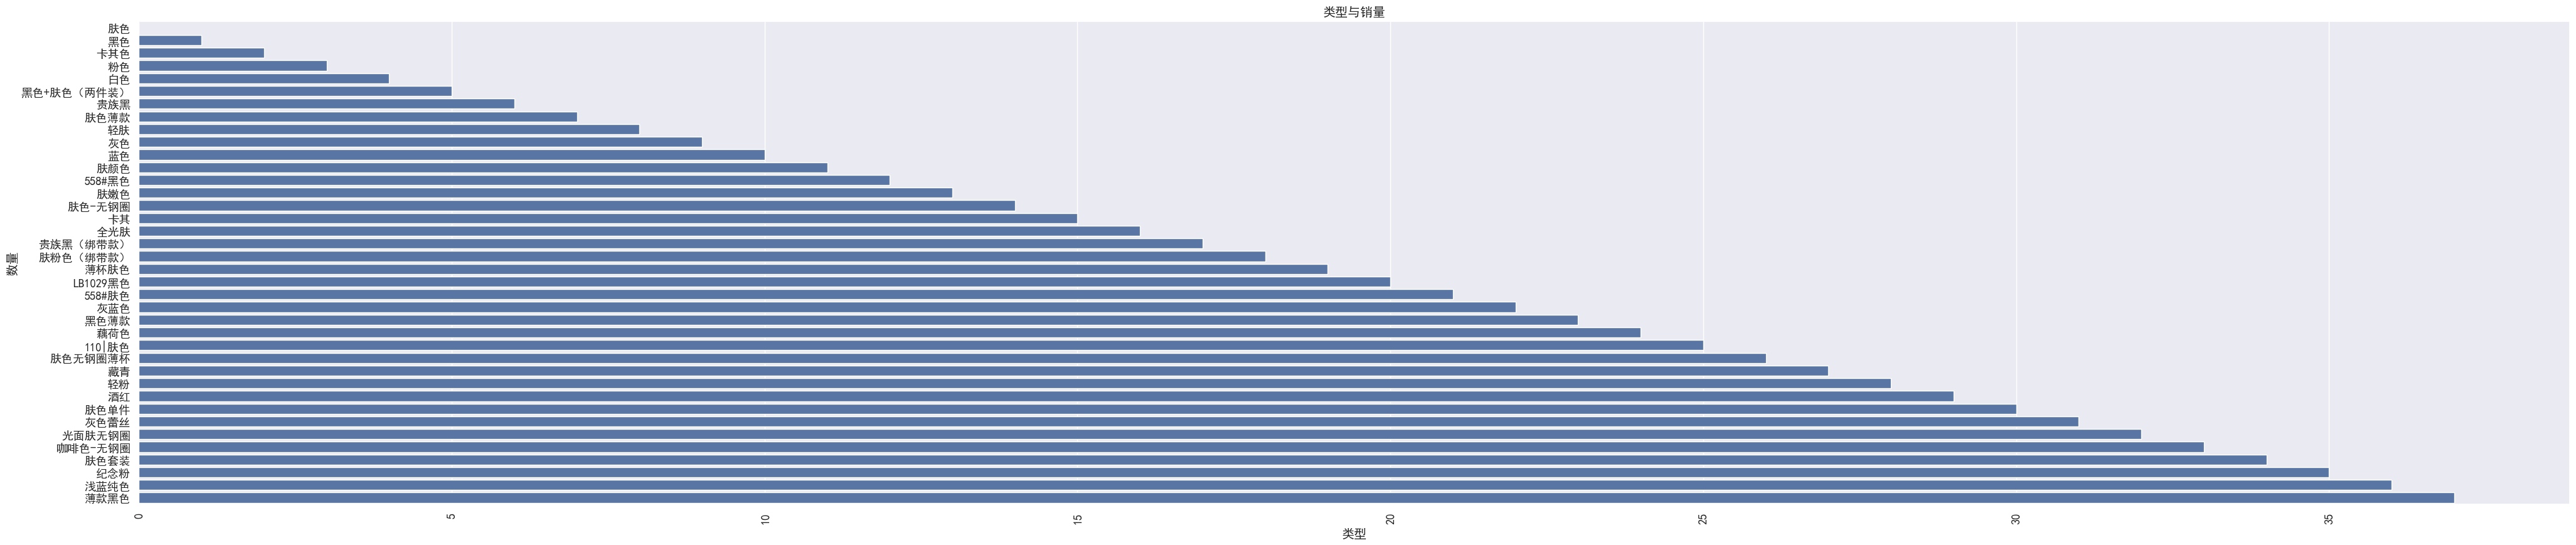

In [67]:
tcount = type_count.reset_index()
plt.figure(figsize=(50,10))
ax = sns.barplot(x= tcount.index, y='colortype', data=tcount)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('类型与销量')
ax.set_ylabel('数量')
ax.set_xlabel('类型')

### 4.3 总结
- 根据大小，备货尽量选择AB，然后准备C，稍微准备点D
- 根据类型，我们可以选择大家喜欢的选择颜色，进行备货

扩展：
- 对类型与颜色再次提取，提取出更多颜色
- 对品论信息进行分类，但是品论没有对应的商品，所以无法确认商品好坏商品好坏


# 泰坦尼克分析
## 1 目的：
- 熟悉数据集
- 熟悉seaborn各种操作作


In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
home = r'data'
df = sns.load_dataset('titanic', data_home=home)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2 数据整理
- 缺省值统计
- 缺省值处理：删除或补齐
- 数据二次处理
### 2.1 统计缺省值计缺省值

In [69]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 2.2 删除与填充
- 删除deck列

In [70]:
pdata = df.drop('deck', axis=1)
pdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


- 年龄使用均值填充

In [71]:
#填充均值
pdata = pdata.fillna(pdata.mean(numeric_only=True)) #Notes:添加numeric_only=True只对数字做处理
#年龄分类
pdata['age_level'] = pd.cut(pdata.age,bins = [0,18,60,100], labels=['child','mid', 'old'])
pdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_level
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,mid
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,mid
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,mid
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,mid
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,mid


## 3 数据统计
### 3.1 基础数据统计
- 年龄分布
- 船舱人数分布
- 男女分布
- 团队人数分布

年龄较分散，使用直方图进行展示方图进行展示

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\2535344476.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pdata.age)


<AxesSubplot: xlabel='age', ylabel='Density'>

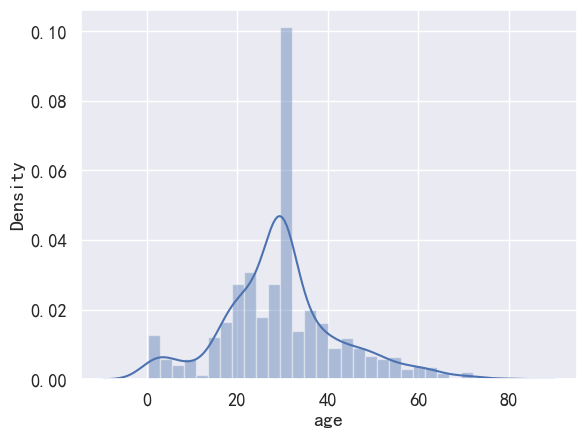

In [72]:
sns.distplot(pdata.age)

<AxesSubplot: ylabel='age'>

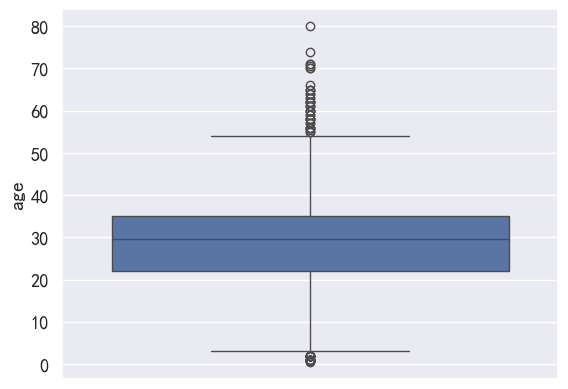

In [73]:
sns.boxplot(pdata.age)

船舱人数，男女人数，团队人数(1个人，两个人，三个人对应的数量)使用柱状图进行展示

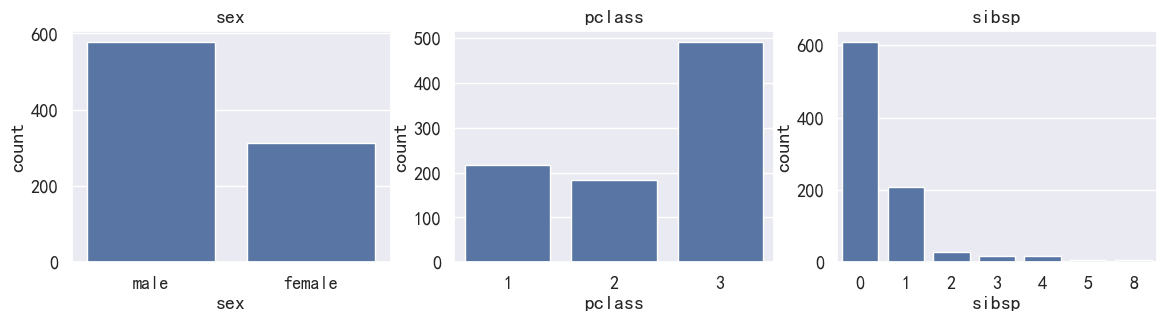

In [74]:
cols = ['sex', 'pclass', 'sibsp']
lens = len(cols)
plt.figure(figsize=(14,3))
for index, col in enumerate(cols):
    plt.subplot(1, lens,index+1)
    ax = sns.countplot(x=col, data=pdata)
    ax.set_title(col)

### 3.2 获救数据
- 获救人数与遇难人数
- 根据性别，统计获救与遇难人数
- 根据年龄段，统计获救与遇难人数
- 根据年龄段，性别，统计获救与遇难人数
- 根据年龄段，性别，船舱，统计获救与遇难人数

<AxesSubplot: xlabel='survived', ylabel='count'>

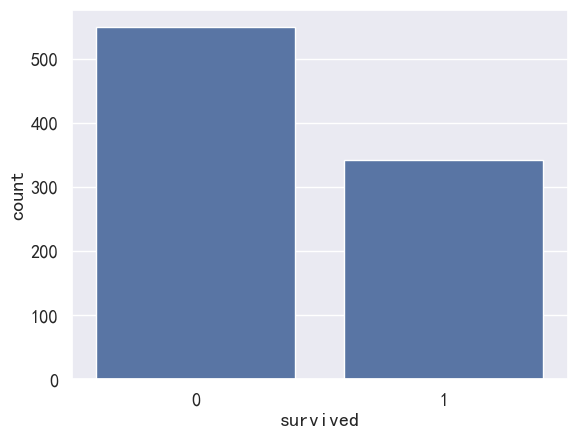

In [75]:
sns.countplot(x='survived', data=pdata)

- 根据性别进行分类

<AxesSubplot: xlabel='sex', ylabel='count'>

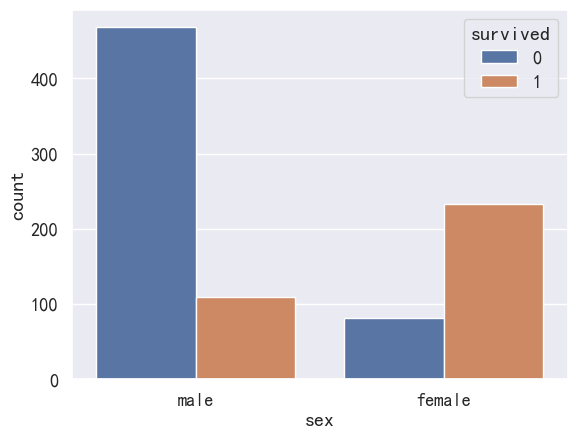

In [76]:
sns.countplot(x='sex', data=pdata, hue='survived')

- 年龄与获救关系

<AxesSubplot: xlabel='age_level', ylabel='count'>

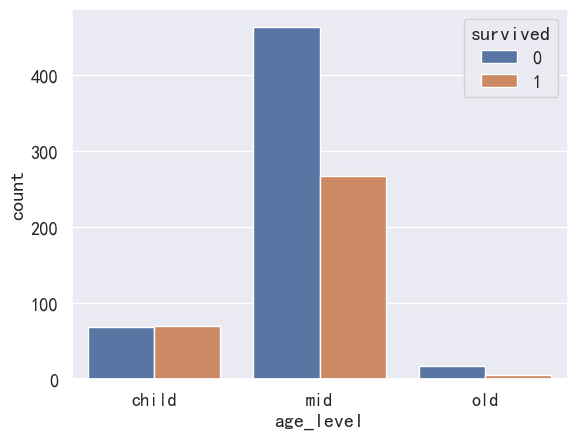

In [77]:
sns.countplot(x='age_level', data=pdata, hue='survived')

- 性别，获救，年龄段，船舱获救统计

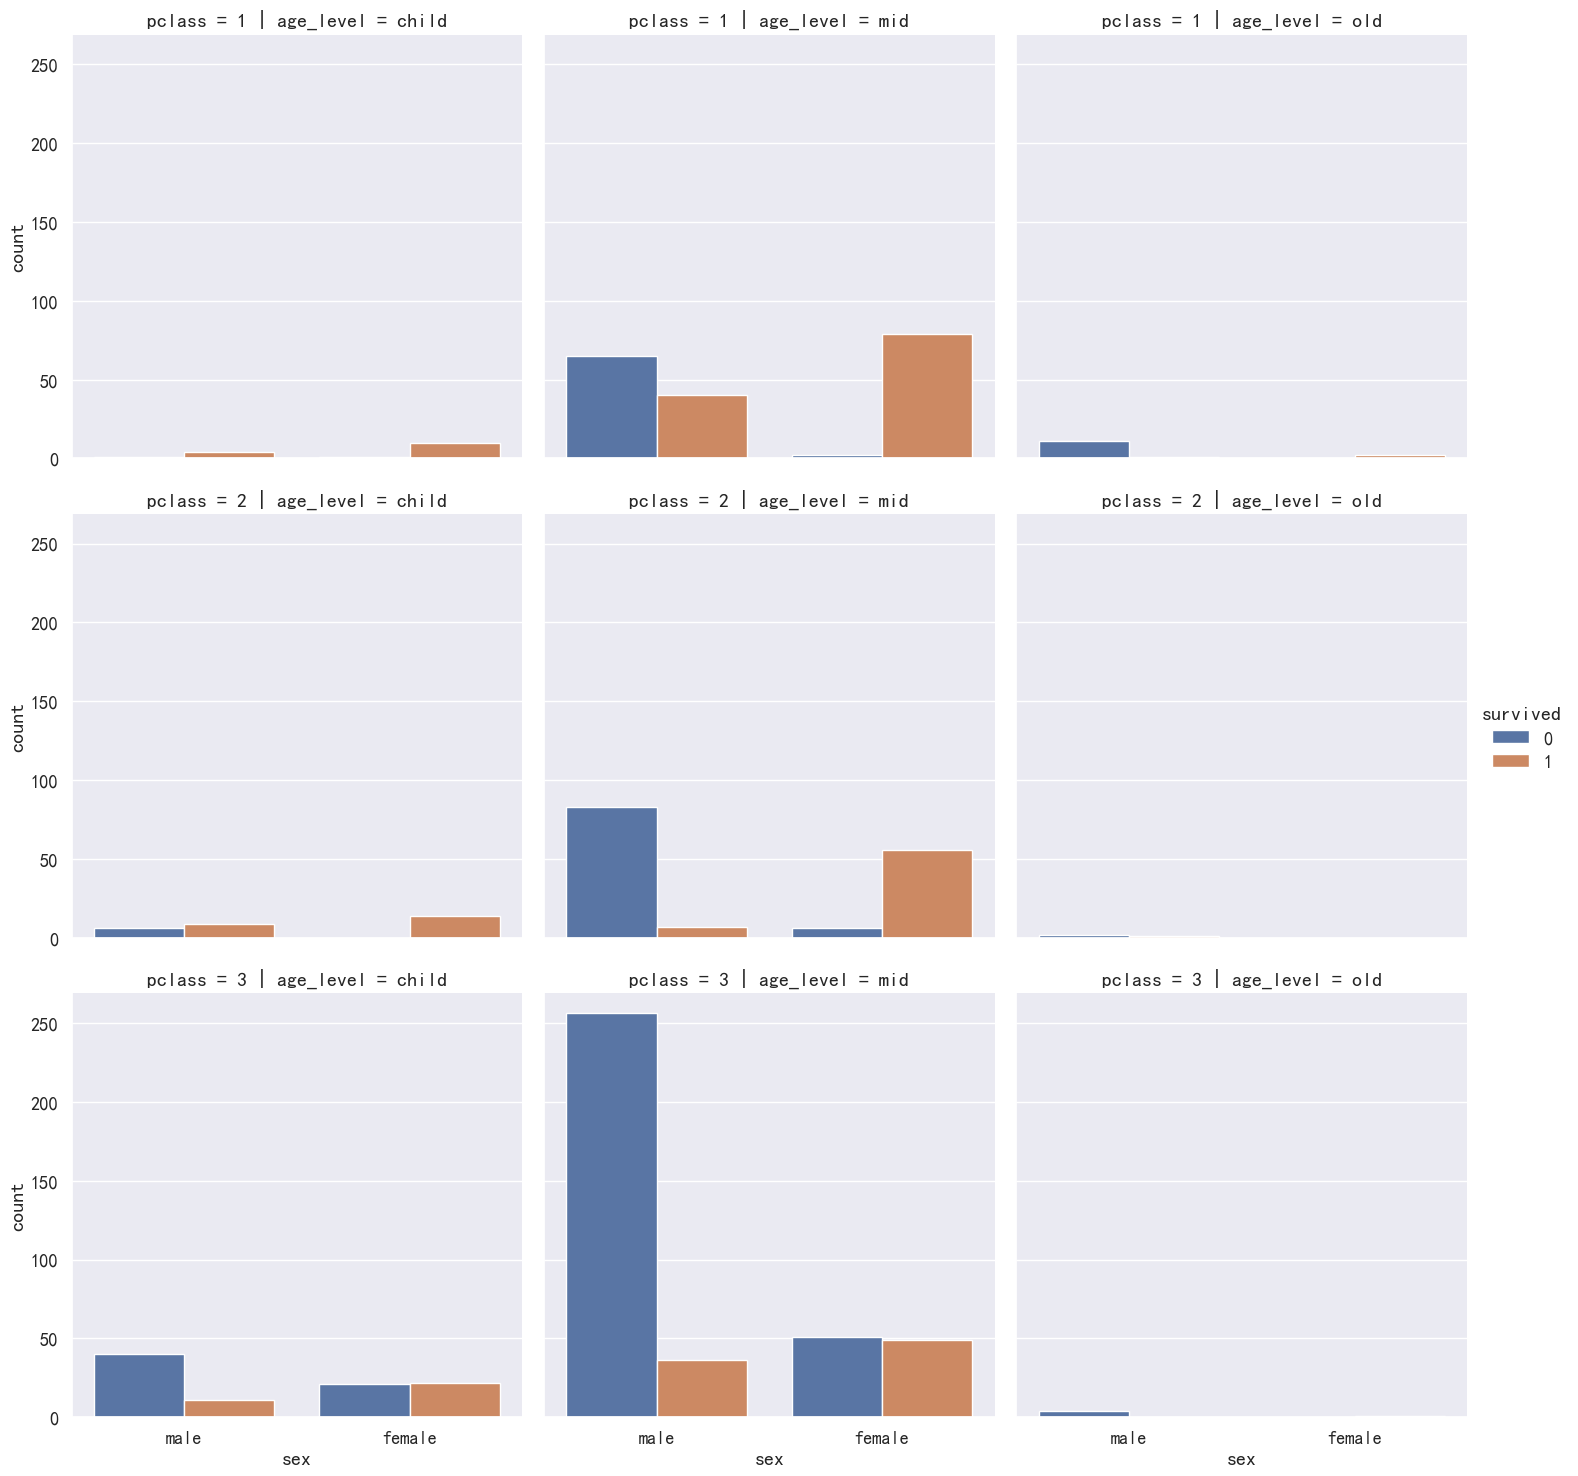

In [78]:
sns.catplot(x='sex', hue='survived', data=pdata, kind='count', col='age_level', row='pclass')

# 电影分析
项目背景：
- 数据集介绍：movie_lens数据集是一个电影信息，电影评分的数据集，可以用来做推荐系统的数据集
- 需求：对电影发展，类型，评分等做统计分析。
- 目标：巩固pandas相关知识点

## 1 数据整理
### 1.1 熟悉数据据知识点

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
mv_path = r'data\ml-latest-small\movies.csv'
rating_path = r'data\ml-latest-small\ratings.csv'
tags_path = r'data\ml-latest-small\tags.csv'
df_mv = pd.read_csv(mv_path)
df_rating = pd.read_csv(rating_path)
df_tags = pd.read_csv(tags_path)
df_mv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [81]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [82]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### 1.2 缺省值判断

In [83]:
dfs = [df_mv, df_rating, df_tags]
for df in dfs:
    print(df.columns.values)
    print(df.isnull().sum())
    print('======')

['movieId' 'title' 'genres']
movieId    0
title      0
genres     0
dtype: int64
['userId' 'movieId' 'rating' 'timestamp']
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
['userId' 'movieId' 'tag' 'timestamp']
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


## 2 电影分析
分析目标：
- 电影数量
- 电影题材数量
- 电影年代
- 标签，评分
### 2.1 数量

In [84]:
df_mv.movieId.size

9742

### 2.2 题材分析
- 查看genres字段


In [85]:
df_mv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 2.3 genres拆分

In [86]:
#设置movieId为索引
#使用前4行练习，
#切分字符串，
#行列转换
tmp = df_mv.set_index('movieId')[:4].genres.str.split('|', expand=True)
tmp

,0,1,2,3,4
movieId,,,,,
1,Adventure,Animation,Children,Comedy,Fantasy
2,Adventure,Children,Fantasy,None,None
3,Comedy,Romance,None,None,None
4,Comedy,Drama,Romance,None,None


In [87]:
t = tmp.stack()
t

movieId   
1        0    Adventure
         1    Animation
         2     Children
         3       Comedy
         4      Fantasy
2        0    Adventure
         1     Children
         2      Fantasy
3        0       Comedy
         1      Romance
4        0       Comedy
         1        Drama
         2      Romance
dtype: object

In [88]:
df_genres = t.droplevel(1)
df_genres

movieId
1    Adventure
1    Animation
1     Children
1       Comedy
1      Fantasy
2    Adventure
2     Children
2      Fantasy
3       Comedy
3      Romance
4       Comedy
4        Drama
4      Romance
dtype: object

In [89]:
# 代码整理
tmp = df_mv.set_index('movieId').genres.str.split('|', expand=True)
t = tmp.stack()
df_genres = tmp.stack().droplevel(1)
df_genres

movieId
1         Adventure
1         Animation
1          Children
1            Comedy
1           Fantasy
            ...    
193583      Fantasy
193585        Drama
193587       Action
193587    Animation
193609       Comedy
Length: 22084, dtype: object

In [90]:
# 查看题材分布
genres = df_genres.value_counts()
genres

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

In [91]:
#列重命名
genres = genres.reset_index().rename({'index':'genres',0:'count'}, axis=1)
genres

,genres,count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


C:\Users\26822\AppData\Local\Temp\ipykernel_22972\715200879.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


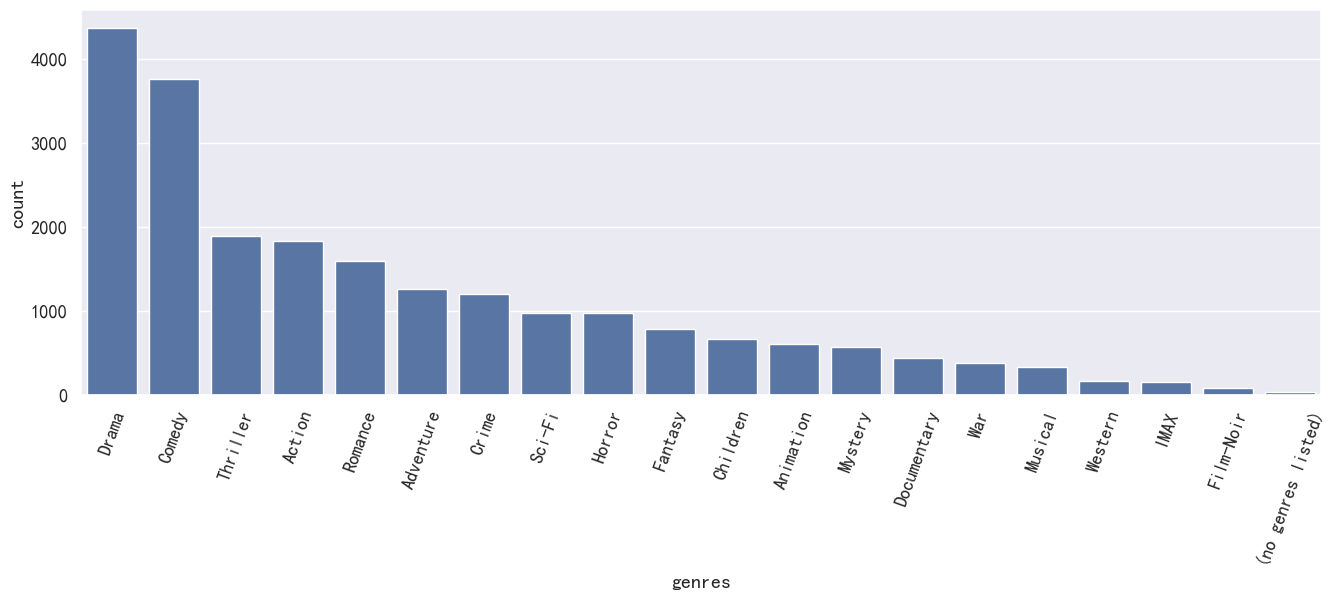

In [92]:
#设置图标格式
plt.figure(figsize=(16,5))
ax = sns.barplot(x='genres', y = 'count', data=genres)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

### 2.4 电影年代
- 数据：

title字段中，含有年代，使用正则表达式提取

- 目标

每个年份电影

每个年份电影题材份电影题材

In [93]:
t = df_mv.set_index('movieId').title
df_year = t.str.extract(r'\((\d+)\)')
#统计没有年份的电影
df_year.isnull().sum()

0    13
dtype: int64

In [94]:
#删除没有年份电影
year_data = df_year.dropna()
#将数据整理成DataFrame对象
year_data = year_data.reset_index().rename({0:'year'}, axis=1)

In [95]:
year_data.head()

,movieId,year
0,1,1995
1,2,1995
2,3,1995
3,4,1995
4,5,1995


In [96]:
# 检查数据
# 提取年份是否正确？
year_data.year.agg(['max', 'min'])

max    500
min     06
Name: year, dtype: object

In [97]:
# 找出异常数据
tmp = year_data[year_data.year.isin(['06','500'])]
tmp

,movieId,year
674,889,06
7074,69757,500


In [98]:
#找出异常原始数据
t = df_mv[df_mv.movieId.isin(tmp.movieId)]
t

,movieId,title,genres
674,889,1-900 (06) (1994),Drama|Romance
7075,69757,(500) Days of Summer (2009),Comedy|Drama|Romance


In [99]:
# 问题：提取数据方式没问题，但是数据不规范，提取其他值
# 解决方式：修改正则表达式
t.title.str.extract(r'\((\d+)\)$')

,0
674,1994
7075,2009


In [100]:
# 重新提取数据
t = df_mv.set_index('movieId').title
df_year = t.str.extract(r'\((\d+)\)$')
#删除没有年份电影
year_data = df_year.dropna()
#将数据整理成DataFrame对象
year_data = year_data.reset_index().rename({0:'year'}, axis=1)
#获取最大最小值
year_data.year.agg(['max', 'min'])

max    2018
min    1902
Name: year, dtype: object

In [101]:
year_data = year_data.sort_values('year')
year_data

,movieId,year
5867,32898,1902
6353,49389,1903
9008,140541,1908
4743,7065,1915
8161,102747,1916
...,...,...
9684,187541,2018
9685,187593,2018
9686,187595,2018
9672,184931,2018


C:\Users\26822\AppData\Local\Temp\ipykernel_22972\860741309.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


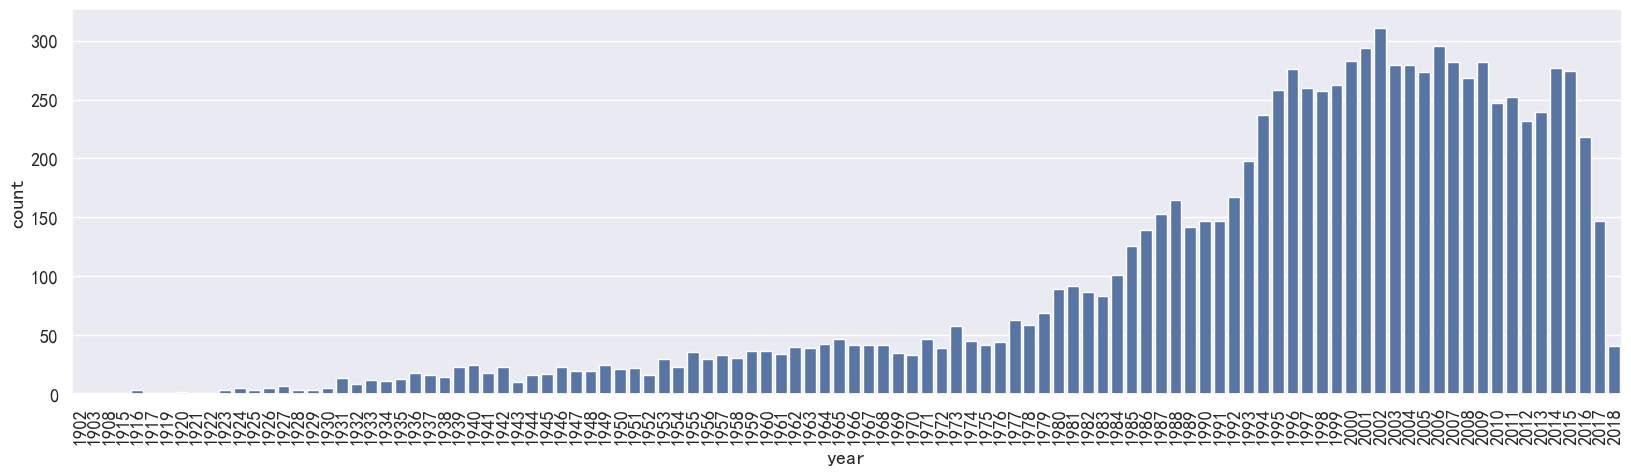

In [102]:
# 按年份进行统计
#设置图标格式
plt.figure(figsize=(20,5))
ax = sns.countplot(x='year', data=year_data)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\517913956.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


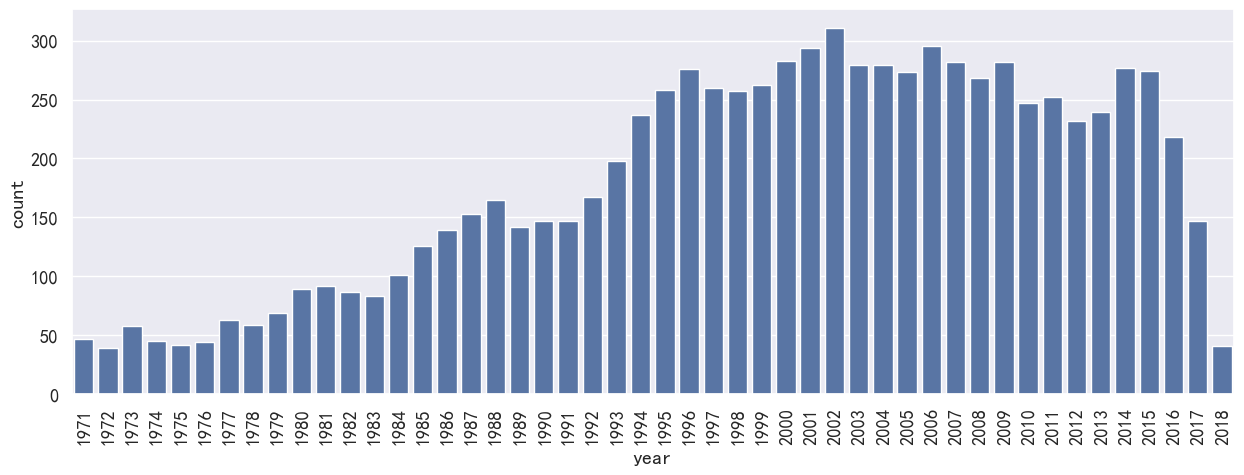

In [103]:
#设年份大与1970
plt.figure(figsize=(15,5))
ax = sns.countplot(x='year', data=year_data[year_data.year>'1970'])
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### 2.5 年代与题材
1990年后：每年不同题材电影数量


In [104]:
year_data.head()

,movieId,year
5867,32898,1902
6353,49389,1903
9008,140541,1908
4743,7065,1915
8161,102747,1916


In [105]:
#df_genres处理
genres_data = df_genres.reset_index().rename({0:'genres'},axis=1)
genres_data.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [106]:
#提取部分数据进行megre
d1 = year_data[:2]
d2 = genres_data[:10]
d1

,movieId,year
5867,32898,1902
6353,49389,1903


In [107]:
d2

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


In [108]:
#实际数据合并，只处理1990年以后数据
ydata = year_data[year_data.year>='1990']
ygdata = ydata.merge(genres_data)
ygdata.year.unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype=object)

C:\Users\26822\AppData\Local\Temp\ipykernel_22972\1779358776.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


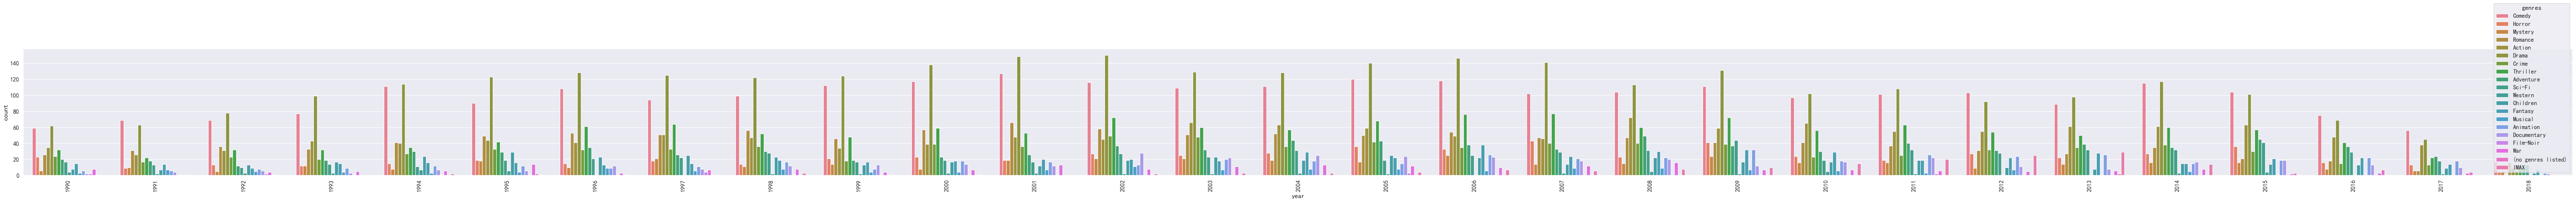

In [109]:
# 绘制柱状图
plt.figure(figsize=(100,5))
ax = sns.countplot(x='year', data=ygdata, hue="genres", orient='v')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

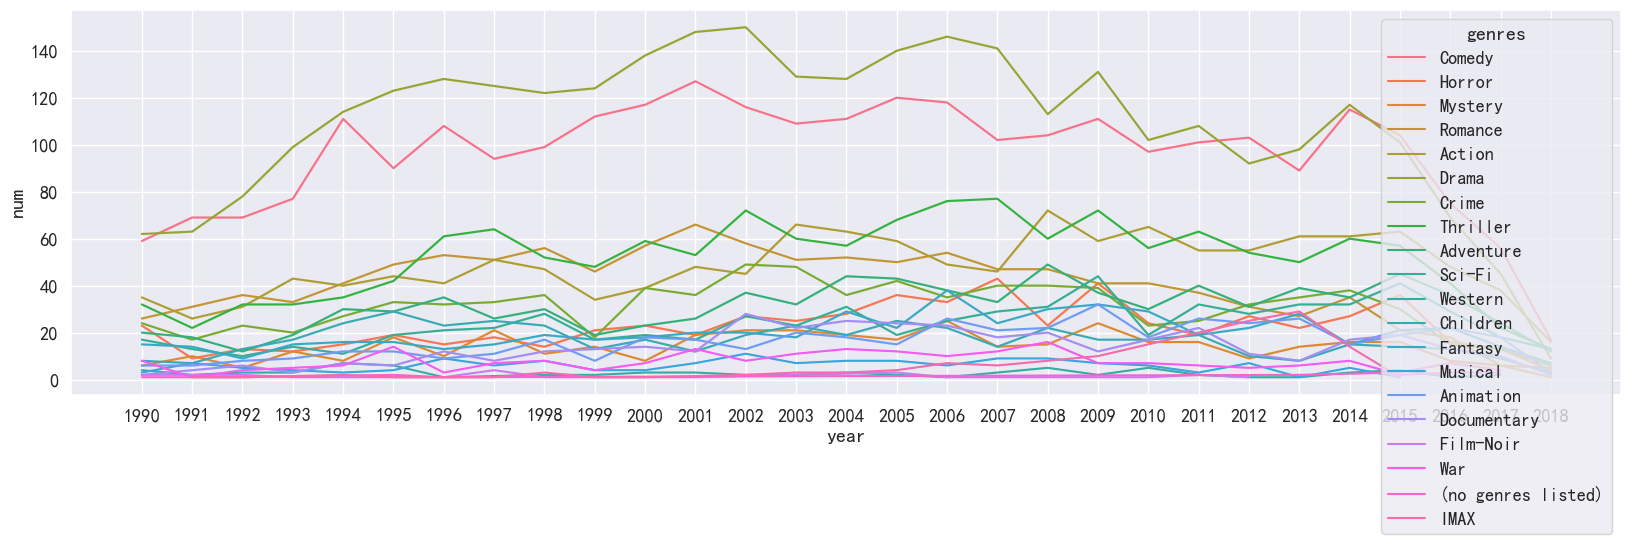

In [110]:
# 绘制线形图
import numpy as np
ygdata['num']=np.ones_like(ygdata.year)
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='year',y='num', data=ygdata, hue="genres", estimator='sum')

In [111]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 3 评分分析
- 每年评价数量
- 小时评价数量
- 月评价数量
- 电影评分数量
- 电影评分排名TOPN
### 3.1 时间分析
- 时间戳转时间
- 获取年月小时
获取年月小时

In [112]:
ts = pd.to_datetime(df_rating.timestamp.values, unit='s')
df_rating['times'] = ts
df_rating['day'] = ts.to_period('D')
df_rating['month'] = ts.map(lambda x:x.month)
df_rating['year'] = ts.to_period('Y')
df_rating['hour'] = ts.map(lambda x:x.hour)
df_rating.head()

,userId,movieId,rating,timestamp,times,day,month,year,hour
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000-07-30,7,2000,18
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000-07-30,7,2000,18
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000-07-30,7,2000,18
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000-07-30,7,2000,19
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000-07-30,7,2000,18


C:\Users\26822\AppData\Local\Temp\ipykernel_22972\1599617490.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


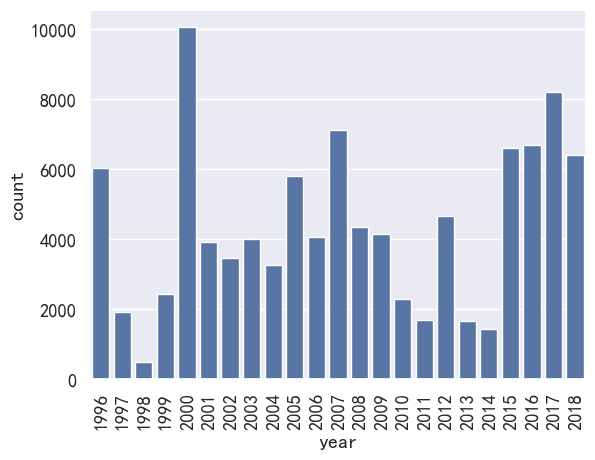

In [113]:
ax = sns.countplot(x='year', data=df_rating, order=sorted(df_rating.year.unique()))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [114]:
sorted(df_rating.year.unique())

[Period('1996', 'A-DEC'),
 Period('1997', 'A-DEC'),
 Period('1998', 'A-DEC'),
 Period('1999', 'A-DEC'),
 Period('2000', 'A-DEC'),
 Period('2001', 'A-DEC'),
 Period('2002', 'A-DEC'),
 Period('2003', 'A-DEC'),
 Period('2004', 'A-DEC'),
 Period('2005', 'A-DEC'),
 Period('2006', 'A-DEC'),
 Period('2007', 'A-DEC'),
 Period('2008', 'A-DEC'),
 Period('2009', 'A-DEC'),
 Period('2010', 'A-DEC'),
 Period('2011', 'A-DEC'),
 Period('2012', 'A-DEC'),
 Period('2013', 'A-DEC'),
 Period('2014', 'A-DEC'),
 Period('2015', 'A-DEC'),
 Period('2016', 'A-DEC'),
 Period('2017', 'A-DEC'),
 Period('2018', 'A-DEC')]

## 3.2 电影评分
### 3.2.1 评价数量前10


In [115]:
#根据movieId分组，统计数量
tmp = df_rating.groupby('movieId').year.count()
#排序，取前10
tmp.sort_values(ascending=False)[:10]

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: year, dtype: int64

In [116]:
tmp = df_rating.groupby('movieId').rating.mean()
tmp

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [117]:
#根据movieId分组，统计数量大于10
tmp = df_rating.groupby('movieId')['rating'].apply(lambda x: 0 if x.size <10 else x.mean())
#排序，取前10
tmp.sort_values(ascending=False)[:10]

movieId
1041    4.590909
3451    4.545455
1178    4.541667
1104    4.475000
2360    4.458333
1217    4.433333
318     4.429022
951     4.392857
1927    4.350000
922     4.333333
Name: rating, dtype: float64

### 3.3 用户喜好
- 用户打标签
- 思路：根据用户评分与电影题材，为用户打标签

1：获取某个用户评分所有电影

2：获取评分电影对应题材

3：统计题材数量并排序


In [118]:
mvids = df_rating[df_rating.userId == 1].movieId
t = genres_data[genres_data.movieId.isin(mvids)].genres.value_counts()
t

genres
Action       90
Adventure    85
Comedy       83
Drama        68
Thriller     55
Fantasy      47
Crime        45
Children     42
Sci-Fi       40
Animation    29
Romance      26
War          22
Musical      22
Mystery      18
Horror       17
Western       7
Film-Noir     1
Name: count, dtype: int64